In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

In [2]:
dataset = pd.read_excel('Win_Prediction_Data.xlsx')
dataset.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [3]:
df = dataset.copy()
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [4]:
# Data Preprocessing- V.V.Imp
# 1) Missing value 
# 2) Outlier
# 3) Encoding - Label encoder, One Hot Encoding, Dummy Variable
# 4) Feature Scaling - Normalisation or Standarisation
# 5) Removing the non-significant variable 
# 6) Imbalance dataset - (this is applicable only for classification problem)
# 7) Duplicate data - data cleaning

# EDA
# Uni-variates, Bi-variates and Multi-variates

# classification model building

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [6]:
df.shape

(10061, 9)

In [7]:
df.isnull().any()

Client Category      True
Solution Type       False
Deal Date           False
Sector              False
Location            False
VP Name             False
Manager Name        False
Deal Cost           False
Deal Status Code    False
dtype: bool

In [8]:
df.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

<AxesSubplot:>

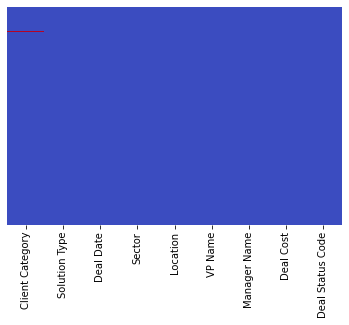

In [9]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')

In [10]:
Client_Category = df['Client Category'].value_counts()

In [11]:
Client_Category

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [12]:
df['Client Category'] = df['Client Category'].fillna('Others')

<AxesSubplot:>

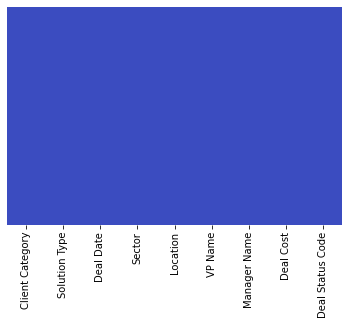

In [13]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')

# summary of categorical variable

In [14]:
sumcat = df.describe(include="O")

In [15]:
sumcat

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [16]:
df.describe()

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [17]:
Client_Category_index = df['Client Category'].value_counts().index

In [18]:
Client_Category_index 

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'International Org', 'Holding', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

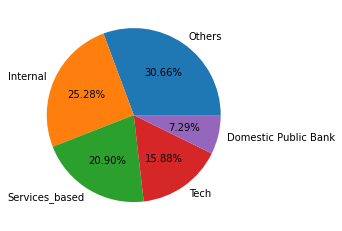

In [19]:
plt.pie(Client_Category[:5], labels=Client_Category_index[:5],autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

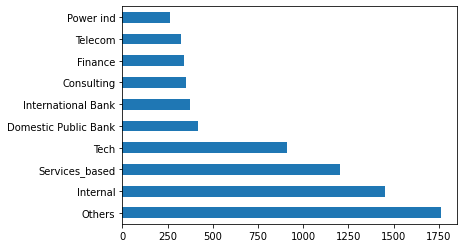

In [20]:
Client_Category[:10].plot(kind='barh')

In [21]:
#sns.histplot(Client_Category)

In [22]:
df.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won


In [23]:
Solution_Type = df['Solution Type'].value_counts()

In [24]:
Solution_Type

Solution 32    1439
Solution 9     1418
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 66       1
Solution 64       1
Solution 19       1
Solution 56       1
Solution 60       1
Name: Solution Type, Length: 67, dtype: int64

In [25]:
Solution_Type_index = df['Solution Type'].value_counts().index
Solution_Type_index

Index(['Solution 32', 'Solution 9', 'Solution 10', 'Solution 39',
       'Solution 67', 'Solution 37', 'Solution 59', 'Solution 12',
       'Solution 8', 'Solution 29', 'Solution 6', 'Solution 13', 'Solution 31',
       'Solution 4', 'Solution 28', 'Solution 38', 'Solution 7', 'Solution 11',
       'Solution 20', 'Solution 52', 'Solution 40', 'Solution 30',
       'Solution 14', 'Solution 36', 'Solution 58', 'Solution 47',
       'Solution 35', 'Solution 55', 'Solution 33', 'Solution 48',
       'Solution 26', 'Solution 16', 'Solution 49', 'Solution 2',
       'Solution 34', 'Solution 42', 'Solution 61', 'Solution 41',
       'Solution 65', 'Solution 44', 'Solution 15', 'Solution 17',
       'Solution 50', 'Solution 24', 'Solution 43', 'Solution 25',
       'Solution 1', 'Solution 46', 'Solution 27', 'Solution 5', 'Solution 62',
       'Solution 3', 'Solution 22', 'Solution 63', 'Solution 54',
       'Solution 53', 'Solution 45', 'Solution 23', 'Solution 21',
       'Solution 51', 'Sol

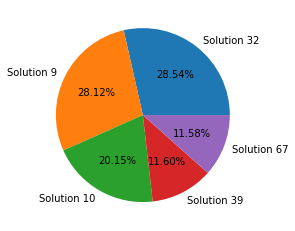

In [26]:
plt.pie(Solution_Type[:5], labels=Solution_Type_index[:5],autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

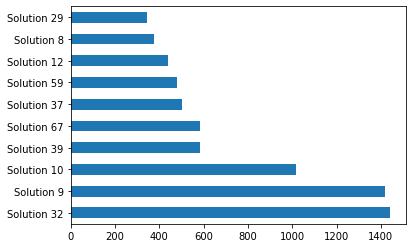

In [27]:
Solution_Type[:10].plot(kind='barh')

In [28]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [29]:
Sector = df['Sector'].value_counts()
Sector

Sector 23    2693
Sector 2     1748
Sector 20     773
Sector 12     607
Sector 24     578
Sector 16     474
Sector 17     474
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      128
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

In [30]:
Sector_index = df['Sector'].value_counts().index
Sector_index

Index(['Sector 23', 'Sector 2', 'Sector 20', 'Sector 12', 'Sector 24',
       'Sector 16', 'Sector 17', 'Sector 15', 'Sector 9', 'Sector 25',
       'Sector 18', 'Sector 1', 'Sector 13', 'Sector 22', 'Sector 19',
       'Sector 3', 'Sector 4', 'Sector 11', 'Sector 14', 'Sector 6',
       'Sector 5', 'Sector 8', 'Sector 21', 'Sector 7', 'Sector 10'],
      dtype='object')

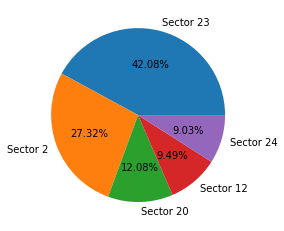

In [31]:
plt.pie(Sector[:5], labels=Sector_index[:5],autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

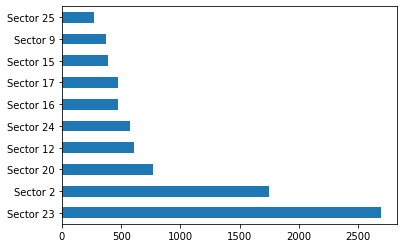

In [32]:
Sector[:10].plot(kind='barh')

In [33]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [34]:
Location = df['Location'].value_counts()
Location

L10       3360
L5        2328
L1        1572
Others     817
L3         556
L11        367
L12        276
L9         240
L7         238
L4         188
L6         100
L8          11
L2           8
Name: Location, dtype: int64

In [35]:
Location_index = df['Location'].value_counts().index
Location_index

Index(['L10', 'L5', 'L1', 'Others', 'L3', 'L11', 'L12', 'L9', 'L7', 'L4', 'L6',
       'L8', 'L2'],
      dtype='object')

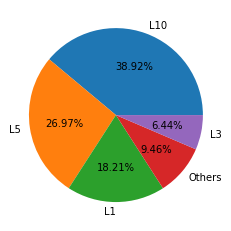

In [36]:
plt.pie(Location[:5], labels=Location_index[:5],autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

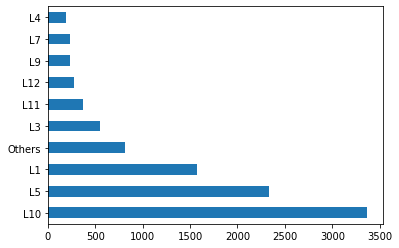

In [37]:
Location[:10].plot(kind='barh')

In [38]:
VP_Name = df['VP Name'].value_counts()
VP_Name

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Alam Syed               126
Molly Eakes             126
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Marcella Mo              32
Rahul Kocher             32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [39]:
VP_Name_index = df['VP Name'].value_counts().index
VP_Name_index

Index(['Mervin Harwood', 'Ankita Aggarwal', 'Sargar Deep Rao',
       'Long Bergstrom', 'Mangesh K. Singh', 'Rosanna Maynez', 'Ekta Zutshi',
       'Rahul Bajpai', 'neeraj kumar', 'Son Mcconnaughy', 'som dutt',
       'Hardeep Suksma', 'Brendon Wycoff', 'Clinton Mani', 'Saurabh Singh',
       'Jewell Tunstall', 'Rudraksh Sharma', 'Gopa Trilochana',
       'Russell Dahlen', 'Alam Syed', 'Molly Eakes', 'Gaurav Sameria',
       'Varsha Arora', 'Gayle Molter', 'Vidur Hukle', 'Earline Langton',
       'Manpreet Singh', 'Mayank Mewar', 'Marcella Mo', 'Rahul Kocher',
       'Man Suddeth', 'Jitendra Choudhary', 'Prashant Rawat', 'Lilli Storrs',
       'Vikram Rawat', 'Kamelesh Srinivasan', 'Dennis Faux', 'Waylon Mulder',
       'Visvajeet Das', 'Sarthak Batra', 'md. afsar', 'P. Somya',
       'Kirk Hofmeister'],
      dtype='object')

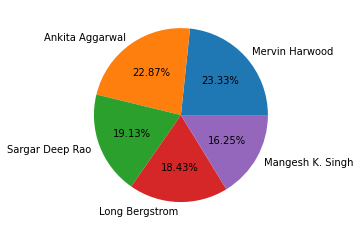

In [40]:
plt.pie(VP_Name[:5], labels=VP_Name_index[:5],autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

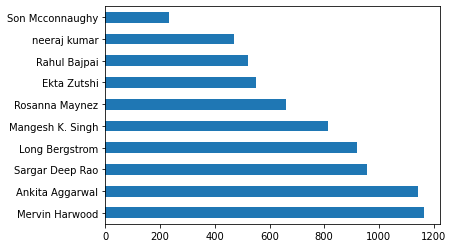

In [41]:
VP_Name[:10].plot(kind='barh')

In [42]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [43]:
Manager_Name = df['Manager Name'].value_counts()
Manager_Name

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Uzaar Ali            1
pooran chand         1
Ike Deppen           1
Jayant Kalra         1
Arti Bindra          1
Name: Manager Name, Length: 278, dtype: int64

In [44]:
Manager_Name_index = df['Manager Name'].value_counts().index
Manager_Name_index 

Index(['Molly Eakes', 'Rudraksh Sharma', 'Desmond Krout', 'Gayle Molter',
       'Manpreet Singh', 'Rosana Yokum', 'Rayford Durgan', 'Manish Saundriyal',
       'Jewell Tunstall', 'Hardeep Suksma',
       ...
       'Cori Gillispie', 'Anju Nanda', 'Cleotilde Biron', 'Palmer Holmberg',
       'Heath Mullarkey', 'Uzaar Ali', 'pooran chand', 'Ike Deppen',
       'Jayant Kalra', 'Arti Bindra'],
      dtype='object', length=278)

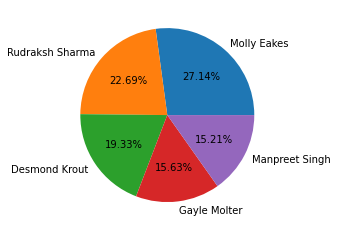

In [45]:
plt.pie(Manager_Name[:5], labels=Manager_Name_index[:5],autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

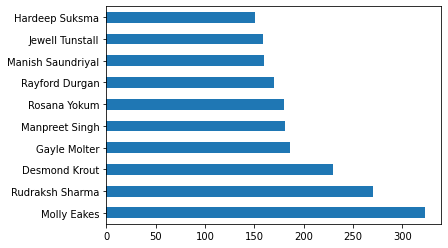

In [46]:
Manager_Name[:10].plot(kind='barh')

In [47]:
Deal_Status_Code = df['Deal Status Code'].value_counts()
Deal_Status_Code

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [48]:
Deal_Status_Code_index = df['Deal Status Code'].value_counts().index
Deal_Status_Code_index

Index(['Lost', 'Won'], dtype='object')

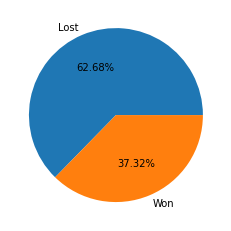

In [49]:
plt.pie(Deal_Status_Code[:5], labels=Deal_Status_Code_index[:5],autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

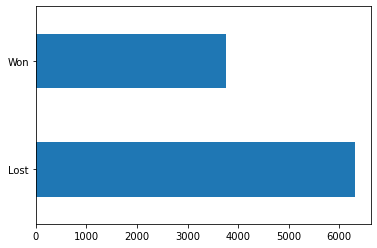

In [50]:
Deal_Status_Code[:10].plot(kind='barh')

In [51]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


# Checking the relation between different variables

In [52]:
rel_client_cat = df[['Client Category','Deal Status Code']].groupby(['Client Category',
                                                                     'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [53]:
rel_client_cat

,Client Category,Deal Status Code,Deal Status Count
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


In [54]:
Solution_Typet_cat = df[['Solution Type','Deal Status Code']].groupby(['Solution Type',
                                                                     'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [55]:
Solution_Typet_cat

,Solution Type,Deal Status Code,Deal Status Count
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


In [56]:
# home work - find the relationship between Idv and dv
print(pd.pivot_table(df, index = 'Deal Status Code', columns='Client Category',values='Deal Cost'))

Client Category        Airpline    Automobiles    Consulting  Consumer Good  \
Deal Status Code                                                              
Lost              482887.701818  706355.042679  6.088462e+05  629885.954898   
Won               549411.768000  537281.641061  1.528884e+06  859452.332644   

Client Category   Domestic Bank  Domestic Private Bank  Domestic Public Bank  \
Deal Status Code                                                               
Lost               1.495498e+06          881407.086023          1.070093e+06   
Won                1.919716e+06          688611.491860          5.993003e+05   

Client Category     Electronics        Energy        Energy   ...  \
Deal Status Code                                              ...   
Lost              553812.637407  1.557206e+06  694726.890714  ...   
Won               596633.987407  6.761059e+05  926633.987778  ...   

Client Category      Power ind    Real Estate  Research Development  \
Deal Status Co

In [57]:
print(pd.pivot_table(df, index = 'Deal Status Code', columns='Solution Type',values='Deal Cost'))

Solution Type     Solution 1    Solution 10   Solution 11    Solution 12  \
Deal Status Code                                                           
Lost               224117.65  676461.210986  1.543663e+06  825068.800058   
Won                150196.08  594538.975828  3.059717e+06  897737.095714   

Solution Type       Solution 13   Solution 14    Solution 15    Solution 16  \
Deal Status Code                                                              
Lost              826709.730748  1.018263e+06  889215.686667  608529.412222   
Won               702220.889286  5.171639e+05  347794.115000  650735.295000   

Solution Type      Solution 17  Solution 18  ...   Solution 61  Solution 62  \
Deal Status Code                             ...                              
Lost              1.029412e+06          NaN  ...  2.458824e+06  2794117.650   
Won               6.669118e+05     225000.0  ...  1.279816e+06  3708970.585   

Solution Type     Solution 63  Solution 64  Solution 65  Solu

In [58]:

print(pd.pivot_table(df, index = 'Deal Status Code', columns='VP Name',values='Deal Cost'))

VP Name              Alam Syed  Ankita Aggarwal  Brendon Wycoff  \
Deal Status Code                                                  
Lost              1.087144e+06     654206.63000    1.096894e+06   
Won               1.172937e+06     503528.35065    1.909288e+06   

VP Name            Clinton Mani    Dennis Faux  Earline Langton   Ekta Zutshi  \
Deal Status Code                                                                
Lost              776755.218548  554656.861667     1.189219e+06  7.912821e+05   
Won               600857.843500  315294.120000     6.034314e+05  1.021396e+06   

VP Name           Gaurav Sameria  Gayle Molter  Gopa Trilochana  ...  \
Deal Status Code                                                 ...   
Lost               554590.017879  7.291971e+05     1.464321e+06  ...   
Won                586433.823958  1.282863e+06     8.195701e+05  ...   

VP Name           Saurabh Singh  Son Mcconnaughy  Varsha Arora    Vidur Hukle  \
Deal Status Code                    

In [59]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [64]:
df['Deal_Date_year'] = df['Deal Date'].dt.year

In [65]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


<AxesSubplot:xlabel='Deal_Date_year', ylabel='Count'>

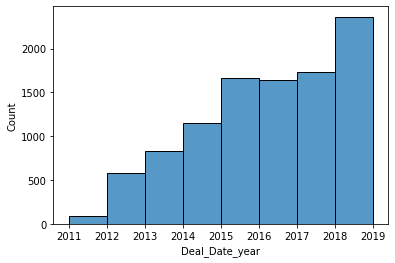

In [66]:
sns.histplot(df.Deal_Date_year, bins = 8)

In [67]:
df['Deal_date_month'] = df['Deal Date'].dt.month

In [68]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_date_month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


<AxesSubplot:xlabel='Deal_date_month', ylabel='Count'>

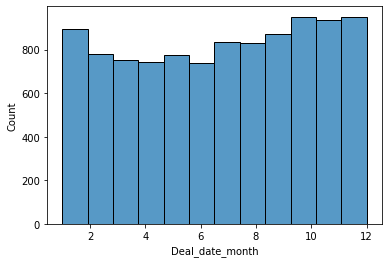

In [69]:
sns.histplot(df.Deal_date_month, bins = 12)

In [70]:
df['Deal_date_quarter'] = df['Deal Date'].dt.quarter

In [71]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_date_month,Deal_date_quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [72]:
df.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code',
       'Deal_Date_year', 'Deal_date_month', 'Deal_date_quarter'],
      dtype='object')

<AxesSubplot:xlabel='Deal_date_quarter', ylabel='Count'>

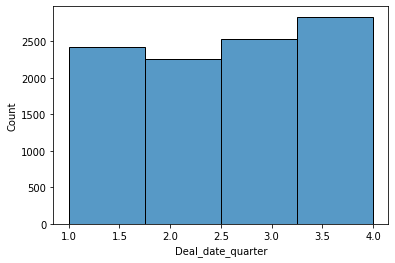

In [73]:
sns.histplot(df.Deal_date_quarter, bins = 4)

In [74]:
df = df.drop(['Deal Date'], axis=1)

In [75]:
df.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_date_month,Deal_date_quarter
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [76]:
df['Client Category'] = df['Client Category'].astype('category')
df['Client Category'] = df['Client Category'].cat.codes

In [77]:
df.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_date_month,Deal_date_quarter
0,39,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,39,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,19,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,19,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,19,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [78]:
df['Solution Type'] = df['Solution Type'].astype('category')
df['Solution Type'] = df['Solution Type'].cat.codes

In [79]:
df['Sector'] = df['Sector'].astype('category')
df['Sector'] = df['Sector'].cat.codes

In [80]:
df['Location'] = df['Location'].astype('category')
df['Location'] = df['Location'].cat.codes

In [81]:
df['VP Name'] = df['VP Name'].astype('category')
df['VP Name'] = df['VP Name'].cat.codes

In [82]:
df['Manager Name'] = df['Manager Name'].astype('category')
df['Manager Name'] = df['Manager Name'].cat.codes

In [83]:
df['Deal Status Code'] = df['Deal Status Code'].astype('category')
df['Deal Status Code'] = df['Deal Status Code'].cat.codes

In [84]:
df.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_date_month,Deal_date_quarter
0,39,64,16,7,6,82,150000.00,1,2012,3,1
1,39,64,16,7,6,82,744705.88,1,2012,9,3
2,19,54,12,12,6,183,60000.00,0,2011,8,3
3,19,54,12,12,6,183,60000.00,0,2011,4,2
4,19,25,12,12,6,183,80882.35,0,2011,6,2


In [85]:
# split into dep and ind variable
x = df.drop(['Deal Status Code'], axis=1)
y = df['Deal Status Code']

In [86]:
x.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Date_year,Deal_date_month,Deal_date_quarter
0,39,64,16,7,6,82,150000.00,2012,3,1
1,39,64,16,7,6,82,744705.88,2012,9,3
2,19,54,12,12,6,183,60000.00,2011,8,3
3,19,54,12,12,6,183,60000.00,2011,4,2
4,19,25,12,12,6,183,80882.35,2011,6,2


In [88]:
x = x.iloc[:,0:7]

In [89]:
x.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost
0,39,64,16,7,6,82,150000.00
1,39,64,16,7,6,82,744705.88
2,19,54,12,12,6,183,60000.00
3,19,54,12,12,6,183,60000.00
4,19,25,12,12,6,183,80882.35


In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)

In [92]:
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

In [87]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Deal Status Code, dtype: int8

In [94]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, train_size=0.75,random_state=101)

# Logistic Regression 

In [96]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [97]:
y_pred_test = logit.predict(x_test)
y_pred_train = logit.predict(x_train)


In [98]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [100]:
print(confusion_matrix(y_train, y_pred_train))
print("###"*50)
print(confusion_matrix(y_test, y_pred_test))

[[4667    8]
 [2862    8]]
######################################################################################################################################################
[[1627    4]
 [ 883    2]]


In [101]:
print(classification_report(y_train, y_pred_train))
print("###"*50)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      4675
           1       0.50      0.00      0.01      2870

    accuracy                           0.62      7545
   macro avg       0.56      0.50      0.39      7545
weighted avg       0.57      0.62      0.48      7545

######################################################################################################################################################
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1631
           1       0.33      0.00      0.00       885

    accuracy                           0.65      2516
   macro avg       0.49      0.50      0.40      2516
weighted avg       0.54      0.65      0.51      2516



In [102]:
print(accuracy_score(y_train, y_pred_train))
print("###"*50)
print(accuracy_score(y_test, y_pred_test))

0.6196156394963552
######################################################################################################################################################
0.6474562798092209


# cross validation (k-fold method)

In [105]:
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(logit, x_train, y_train, cv=15)
accuracy_test = cross_val_score(logit, x_test, y_test, cv=15)
print(accuracy_train)
print("###"*20)
print(accuracy_test)

[0.62027833 0.62027833 0.61829026 0.6222664  0.61829026 0.62027833
 0.61630219 0.62027833 0.62027833 0.62425447 0.62027833 0.61829026
 0.62027833 0.61829026 0.61431412]
############################################################
[0.64880952 0.6547619  0.64880952 0.64880952 0.64880952 0.64880952
 0.64880952 0.64880952 0.64880952 0.64880952 0.64880952 0.64670659
 0.64670659 0.64670659 0.64071856]


In [107]:
# XGBoost model because we are getting high bias
from xgboost import XGBClassifier
xgb_class = XGBClassifier()
xgb_class.fit(x_train, y_train)

[21:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_pred_xgb_train = xgb_class.predict(x_train)
y_pred_xgb_test = xgb_class.predict(x_test)

In [109]:
print(accuracy_score(y_train, y_pred_xgb_train))
print("###"*50)
print(accuracy_score(y_test, y_pred_xgb_test))

0.9271040424121935
######################################################################################################################################################
0.794912559618442


In [111]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(xgb_class, x_test, y_test, cv=20)
print(accuracy_test)

[21:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [112]:
print(accuracy_test[10])

0.8333333333333334


In [ ]:
# Train Accuracy - 0.9271040424121935
# Test Accuracy - 0.8333333333333334

# Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [115]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [116]:
print(accuracy_score(y_train, y_pred_rf_train))
print("###"*50)
print(accuracy_score(y_test, y_pred_rf_test))

0.9965540092776674
######################################################################################################################################################
0.8282988871224165


In [117]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(rf, x_test, y_test, cv=20)
print(accuracy_test)

[0.67460317 0.64285714 0.68253968 0.72222222 0.67460317 0.72222222
 0.72222222 0.66666667 0.78571429 0.67460317 0.80952381 0.73809524
 0.74603175 0.69047619 0.70634921 0.77777778 0.72       0.728
 0.744      0.776     ]
